In [1]:
#using Revise
addprocs(4)
using CMDPs
using POMDPs, POMDPToolbox, POMDPModels, MCTS
using DataFrames
using Plots; gr()

Plots.GRBackend()

In [2]:
mdp = InvertedPendulum()
b = DPWBandit(mdp)
solver = ModularSolver(mdp, b, n_iterations=5)
policy = solve(solver, mdp);

In [3]:
s0 = initial_state(mdp, Base.GLOBAL_RNG)

(-0.030613799166249712, 0.0201526516242315)

In [4]:
hr = HistoryRecorder(; max_steps=40, rng=Base.GLOBAL_RNG)
h = simulate(hr, mdp, policy, s0);

In [5]:
h.state_hist

41-element Array{Tuple{Float64,Float64},1}:
 (-0.0306138, 0.0201527)
 (0.00868272, 0.765778) 
 (0.0487041, 0.0346505) 
 (0.0114786, -0.779161) 
 (-0.0211156, 0.127276) 
 (-0.0102666, 0.0897042)
 (0.0373034, 0.861697)  
 (0.0830394, 0.0530228) 
 (0.0486034, -0.741744) 
 (0.0187228, 0.144133)  
 (0.0326877, 0.135165)  
 (0.0550613, 0.312308)  
 (0.0954947, 0.49636)   
 ⋮                      
 (-0.059814, 0.789756)  
 (-0.0292621, -0.178719)
 (-0.049314, -0.222318) 
 (-0.0335793, 0.537013) 
 (0.00937014, 0.321976) 
 (0.0431175, 0.352972)  
 (0.0359251, -0.49682)  
 (-0.0140693, -0.503069)
 (-0.0289141, 0.206174) 
 (0.0321238, 1.01458)   
 (0.0886823, 0.116586)  
 (0.103432, 0.178416)   

In [6]:
h.reward_hist

40-element Array{Float64,1}:
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 ⋮  
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1
 0.1

In [7]:
## Study

In [8]:
study = RewardvsN(; mdp=InvertedPendulum(), n_seeds=50, n_iters=[5, 10, 20, 30, 40, 50], max_steps=50)

CMDPs.RewardvsN
  mdp: POMDPModels.InvertedPendulum
  bandits: Array{DataType}((2,))
  n_seeds: Int64 50
  n_iters: Array{Int64}((6,)) [5, 10, 20, 30, 40, 50]
  max_steps: Int64 50


In [9]:
result = run_study(study)

CMDPs.RewardvsNResult("Inverted Pendulum", 600×4 DataFrames.DataFrame
│ Row │ alg          │ seed │ n_iters │ r_total │
├─────┼──────────────┼──────┼─────────┼─────────┤
│ 1   │ DPWBandit    │ 1    │ 5       │ 0.3     │
│ 2   │ DPWBandit    │ 2    │ 5       │ 5.0     │
│ 3   │ DPWBandit    │ 3    │ 5       │ 3.7     │
│ 4   │ DPWBandit    │ 4    │ 5       │ 1.6     │
│ 5   │ DPWBandit    │ 5    │ 5       │ 5.0     │
│ 6   │ DPWBandit    │ 6    │ 5       │ 1.9     │
│ 7   │ DPWBandit    │ 7    │ 5       │ -0.2    │
│ 8   │ DPWBandit    │ 8    │ 5       │ 5.0     │
│ 9   │ DPWBandit    │ 9    │ 5       │ 5.0     │
│ 10  │ DPWBandit    │ 10   │ 5       │ 1.3     │
│ 11  │ DPWBandit    │ 11   │ 5       │ 1.7     │
⋮
│ 589 │ RandomBandit │ 39   │ 50      │ 5.0     │
│ 590 │ RandomBandit │ 40   │ 50      │ 5.0     │
│ 591 │ RandomBandit │ 41   │ 50      │ 5.0     │
│ 592 │ RandomBandit │ 42   │ 50      │ 5.0     │
│ 593 │ RandomBandit │ 43   │ 50      │ 5.0     │
│ 594 │ RandomBandit │ 44   

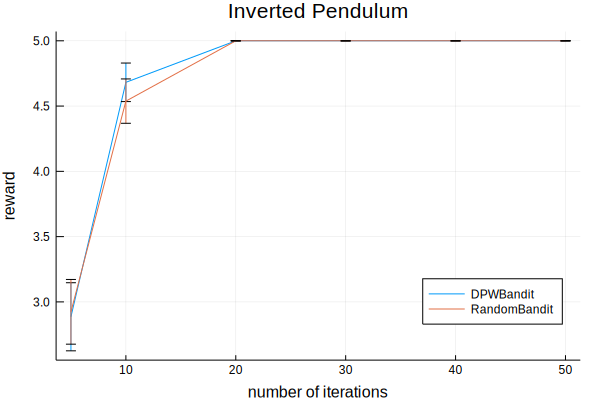

In [11]:
p=Plots.plot(result)

In [12]:
savefig(p, "./RvN_invertedpendulum.pdf")